In [1]:
#importando bibliotecas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# Analise do Dataset

In [2]:
#carregar dataset

df = pd.read_csv('C:/Users/lucas/Documents/Projeto/hr-analytics/data/hr_analytics.csv')
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
map = {'Yes': 'Saiu', 'No': 'Ficou'}
df['Attrition'] = df['Attrition'].replace(map)


In [4]:
df.info()
df.describe()
df.isnull().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

EmpID                       1480
Age                         1480
AgeGroup                    1480
Attrition                   1480
BusinessTravel              1480
DailyRate                   1480
Department                  1480
DistanceFromHome            1480
Education                   1480
EducationField              1480
EmployeeCount               1480
EmployeeNumber              1480
EnvironmentSatisfaction     1480
Gender                      1480
HourlyRate                  1480
JobInvolvement              1480
JobLevel                    1480
JobRole                     1480
JobSatisfaction             1480
MaritalStatus               1480
MonthlyIncome               1480
SalarySlab                  1480
MonthlyRate                 1480
NumCompaniesWorked          1480
Over18                      1480
OverTime                    1480
PercentSalaryHike           1480
PerformanceRating           1480
RelationshipSatisfaction    1480
StandardHours               1480
StockOptio

# Analise descritiva dos dados

Para entender melhor o turnover da empresa peguei a coluna "Attrition", a coluna Attrition indica se o colaborador ainda está na empresa (No) ou se já saiu (Yes). Ela é a base para calcularmos a taxa de turnover, que nos ajuda a entender a retenção de talentos.

Como vemos na análise abaixo o departamento de Vendas é que tem a porcentagem de turnover maior na empresa mas porque será que isso acontece?

In [5]:
#contagem dos total de turnover no de

turnover_dp = df['Department'].value_counts()
turnover_dp

Department
Research & Development    967
Sales                     450
Human Resources            63
Name: count, dtype: int64

In [6]:
# Verificando o departamento com mais taxa de turnover de saida

taxa_turnover_df = df.groupby("Department")["Attrition"].value_counts(normalize=True).unstack() * 100
taxa_turnover_df

Attrition,Ficou,Saiu
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.246122,13.753878
Sales,79.333333,20.666667


In [7]:
#Contagem de turnover de saida por departamento

count_turnover_df = df.groupby("Department")["Attrition"].value_counts()
count_turnover_df

Department              Attrition
Human Resources         Ficou         51
                        Saiu          12
Research & Development  Ficou        834
                        Saiu         133
Sales                   Ficou        357
                        Saiu          93
Name: count, dtype: int64

### Análise de turnover de saída do departamento de vendas

In [8]:
# Criando dataframes que mostram isoladamente as pessoas que ficaram e deixaram a empresa

sales_leaved_df = df[(df['Attrition'] == 'Saiu') & (df['Department'] == 'Sales')]
sales_stayed_df = df[(df['Attrition'] == 'Ficou') & (df['Department'] == 'Sales')]


In [9]:
# Comparação das médias das pessoas que deixaram e ficaram na empresa

avg_job_satisfaction_leaved = sales_leaved_df["JobSatisfaction"].mean().round(2)
avg_job_satisfaction_stayed = sales_stayed_df["JobSatisfaction"].mean().round(2)

# Comparação das médias da renda mensal das pessoas que deixaram e ficaram na empresa

avg_monthlyincome_leaved = sales_leaved_df["MonthlyIncome"].mean().round(2)
avg_monthlyincome_stayed = sales_stayed_df["MonthlyIncome"].mean().round(2)

# Comparação das médias dos anos da última promoção das pessoas que deixaram e ficaram na empresa

avg_yearssincelastpromotion_leaved = sales_leaved_df["YearsSinceLastPromotion"].mean().round(2)
avg_yearssincelastpromotion__stayed = sales_stayed_df["YearsSinceLastPromotion"].mean().round(2)

print(f'A média de satisfação no departamento de vendas das pessoas que deixaram a empresa é de {avg_job_satisfaction_leaved}%\n'
      f'A média de satisfação no departamento de vendas das pessoas que ficaram na empresa é de {avg_job_satisfaction_stayed}%\n'
      f'A média de renda mensal no departamento de vendas das pessoas que deixaram a empresa é de ${avg_monthlyincome_leaved}\n'
      f'A média de renda mensal no departamento de vendas das pessoas que ficaram na empresa é de ${avg_monthlyincome_stayed}\n'
      f'A média de anos da última promoção no departamento de vendas das pessoas que deixaram a empresa é de {avg_yearssincelastpromotion_leaved} anos\n'
      f'A média de de anos da última promoção no departamento de vendas das pessoas que ficaram na empresa é de {avg_yearssincelastpromotion__stayed} anos'
)

A média de satisfação no departamento de vendas das pessoas que deixaram a empresa é de 2.51%
A média de satisfação no departamento de vendas das pessoas que ficaram na empresa é de 2.81%
A média de renda mensal no departamento de vendas das pessoas que deixaram a empresa é de $5961.63
A média de renda mensal no departamento de vendas das pessoas que ficaram na empresa é de $7228.57
A média de anos da última promoção no departamento de vendas das pessoas que deixaram a empresa é de 2.19 anos
A média de de anos da última promoção no departamento de vendas das pessoas que ficaram na empresa é de 2.4 anos


Com base nas análises acima vemos que não existe tanta diferença nos dados que explique a taxa de turnover de saída do departamento, vamos analisar se faixa etária pode ser um dado que influencie no turnover de saída do departamento de vendas

In [10]:
# Agrupando o grupo de pessoas que sairam da empresa por faixa etária

sales_leaved_df.groupby('AgeGroup')['Age'].count()


AgeGroup
18-25    18
26-35    41
36-45    16
46-55    18
Name: Age, dtype: int64

In [11]:
# Agrupando o grupo de pessoas que ficaram na empresa por faixa etária

sales_stayed_df.groupby('AgeGroup')['Age'].count()

AgeGroup
18-25     23
26-35    154
36-45    111
46-55     56
55+       13
Name: Age, dtype: int64

In [12]:
# Contagem das pessoas do departamento de vendas

df_sales = df[df['Department'] == 'Sales']
df_sales['AgeGroup'].value_counts()

AgeGroup
26-35    195
36-45    127
46-55     74
18-25     41
55+       13
Name: count, dtype: int64

In [13]:
# Porcentagem de Turnover de saída por faixa etária

rate_turnover_18_25 = (18 / 41) * 100
rate_turnover_26_35 = (41 / 195) * 100
rate_turnover_36_45 = (16 / 127) * 100
rate_turnover_46_55 = (18 / 74) * 100
rate_turnover_55 = (0 / 13) * 100


print(f'A taxa de Turnover de saída para faixa etária 18-25 é de {round(rate_turnover_18_25,2)}%\n'
     f'A taxa de Turnover de saída para faixa etária 26-35 é de {round(rate_turnover_26_35,2)}%\n'
     f'A taxa de Turnover de saída para faixa etária 36-45 é de {round(rate_turnover_36_45,2)}%\n'
     f'A taxa de Turnover de saída para faixa etária 46-55 é de {round(rate_turnover_46_55,2)}%\n'
     f'A taxa de Turnover de saída para faixa etária +55 é de {round(rate_turnover_55,2)}%')


A taxa de Turnover de saída para faixa etária 18-25 é de 43.9%
A taxa de Turnover de saída para faixa etária 26-35 é de 21.03%
A taxa de Turnover de saída para faixa etária 36-45 é de 12.6%
A taxa de Turnover de saída para faixa etária 46-55 é de 24.32%
A taxa de Turnover de saída para faixa etária +55 é de 0.0%


### Visualização dos dados do departamento de vendas

Agora para ter uma visão mais clara dos dados vamos usar uma visualização do gráfico de barras, podemos ver melhor a difereça nas taxas de turnover entre as faixas etárias

In [14]:
age_groups = ['18-25','26-35','36-45','46-55','+55']
turnover_percents = [43.90,21.02,12.59,24.32,0.0]

data = {'AgeGroup': age_groups,
        'Turnover_Percent': turnover_percents,
       }

turnover_df = pd.DataFrame(data)


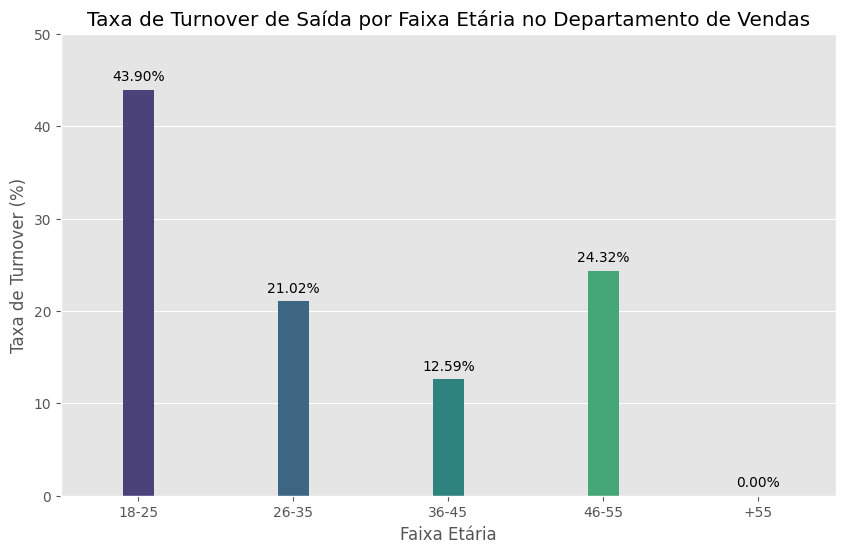

In [15]:
#Criar gráfico de barras

plt.figure(figsize=(10,6)) #define o tamanho da figura
sns.barplot(x='AgeGroup',y='Turnover_Percent', data=turnover_df,hue='AgeGroup', palette = 'viridis',width=0.2)

# Adiciona título e rótulos
plt.title('Taxa de Turnover de Saída por Faixa Etária no Departamento de Vendas')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Turnover (%)')
plt.ylim(0,50) # Ajusta o limite do eixo y para melhor visualização

# Adiciona valor em barras
for index, row in turnover_df.iterrows():
    plt.text(index, row.Turnover_Percent + 1,f'{row.Turnover_Percent:.2f}%',color='black', ha="center")

**Uma outra questão que surgiu que podemos analisar mais afundo é a distribuição de renda mensal entre homens e mulheres no departamento de vendas, para isso vamos usar um gráfico de distrubição com boxplot**


Text(0, 0.5, 'Renda Mensal $')

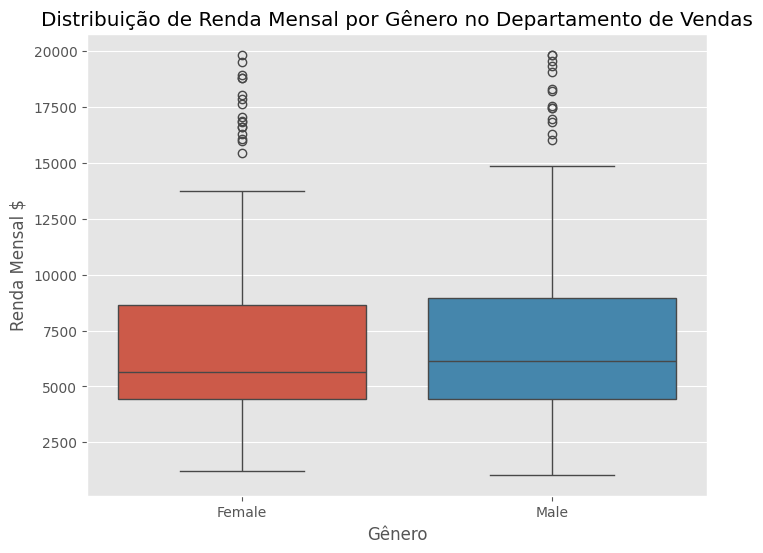

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender',y='MonthlyIncome', data=df_sales, hue='Gender')

# Adiciona título e rótulos
plt.title('Distribuição de Renda Mensal por Gênero no Departamento de Vendas')
plt.xlabel('Gênero')
plt.ylabel('Renda Mensal $')

Após analisar o gráfico de distribuição comecei a investigar se a taxa de turnover de saída é maior entre as mulheres

In [17]:
df_sales = df[df['Department'] == 'Sales']
df_sales.groupby('AgeGroup')['Gender'].value_counts()

AgeGroup  Gender
18-25     Male       24
          Female     17
26-35     Male      117
          Female     78
36-45     Male       73
          Female     54
46-55     Male       39
          Female     35
55+       Female      7
          Male        6
Name: count, dtype: int64

In [18]:
sales_leaved_df.groupby('AgeGroup')['Gender'].value_counts()

AgeGroup  Gender
18-25     Male      10
          Female     8
26-35     Male      23
          Female    18
36-45     Male       9
          Female     7
46-55     Male      13
          Female     5
Name: count, dtype: int64

In [19]:
rate_turnover_18_25_f = (8 / 17) * 100
rate_turnover_26_35_f = (18 / 78) * 100
rate_turnover_36_45_f = (7 / 54) * 100
rate_turnover_46_55_f = (5 / 35) * 100
rate_turnover_55_f = (0 / 7) * 100


print(f'A taxa de Turnover de mulheres na faixa de 18-25 é de {round(rate_turnover_18_25_f,2)}%\n'
      f'A taxa de Turnover de mulheres na faixa de 26-35 é de {round(rate_turnover_26_35_f,2)}%\n'
      f'A taxa de Turnover de mulheres na faixa de 36-45 é de {round(rate_turnover_36_45_f,2)}%\n'
      f'A taxa de Turnover de mulheres na faixa de 46-55 é de {round(rate_turnover_46_55_f,2)}%\n'
      f'A taxa de Turnover de mulheres na faixa de +55 é de {round(rate_turnover_55_f,2)}%')

A taxa de Turnover de mulheres na faixa de 18-25 é de 47.06%
A taxa de Turnover de mulheres na faixa de 26-35 é de 23.08%
A taxa de Turnover de mulheres na faixa de 36-45 é de 12.96%
A taxa de Turnover de mulheres na faixa de 46-55 é de 14.29%
A taxa de Turnover de mulheres na faixa de +55 é de 0.0%


**Conclusão da Análise de Turnover em Vendas**

A análise aprofundada do turnover no departamento de Vendas revelou que, apesar de o grupo de 26-35 anos apresentar o maior número bruto de desligamentos, a maior taxa de turnover, em termos proporcionais, está concentrada na faixa etária de **18-25 anos**, atingindo um pico de **43,90%**.

Esta descoberta sugere que os desafios de retenção no departamento estão mais acentuados entre os funcionários em início de carreira, o que se alinha às observações sobre as expectativas da Geração Z em relação ao ambiente de trabalho, cultura da empresa e desenvolvimento profissional.

Portanto, as iniciativas futuras para mitigar o turnover devem ser direcionadas e personalizadas para este grupo demográfico, com foco em programas de engajamento, mentoria e aprimoramento da cultura organizacional.

## Análise de turnover de saída do departamento de recursos humanos

In [20]:
#Definição do dataset do departamento de recursos humanos

df_rh = df[df['Department'] == 'Human Resources']

df_rh

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
12,RM423,19,18-25,Saiu,Travel_Rarely,489,Human Resources,2,2,Technical Degree,...,3,80,0,1,3,4,1,0,0,0.0
93,RM1223,24,18-25,Saiu,Travel_Rarely,240,Human Resources,22,1,Human Resources,...,3,80,1,1,2,3,1,0,0,0.0
95,RM1246,24,18-25,Ficou,Travel_Frequently,897,Human Resources,10,3,Medical,...,4,80,1,3,2,3,2,2,2,1.0
120,RM1412,25,18-25,Ficou,Travel_Rarely,309,Human Resources,2,3,Human Resources,...,3,80,0,6,3,3,2,0,1,2.0
126,RM135,26,26-35,Ficou,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,...,4,80,1,8,3,3,8,7,5,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,RM511,54,46-55,Ficou,Travel_Rarely,397,Human Resources,19,4,Medical,...,3,80,1,16,1,4,9,7,7,1.0
1432,RM1402,55,46-55,Ficou,Travel_Rarely,189,Human Resources,26,4,Human Resources,...,1,80,1,35,0,3,10,9,1,4.0
1440,RM957,56,55+,Ficou,Travel_Rarely,206,Human Resources,8,4,Life Sciences,...,1,80,0,36,4,3,7,3,7,7.0
1468,RM106,59,55+,Ficou,Non-Travel,1420,Human Resources,2,4,Human Resources,...,4,80,1,30,3,3,3,2,2,2.0


In [21]:
# Criando dataframes que mostram isoladamente as pessoas que ficaram e deixaram a empresa

rh_leaved_df = df[(df['Attrition'] == 'Saiu') & (df['Department'] == 'Human Resources')]
rh_stayed_df = df[(df['Attrition'] == 'Ficou') & (df['Department'] == 'Human Resources')]

Vamos pegar algumas méidas para entender o comportamento de dois grupos os que decidem ficar na empresa e dos que deixaram a empresa, com base nesses números vamos obter insights para responder a questão do turnover de saída no departamento de RH, algumas métricas interessantes de se levar em consideração: Renda Mensal, Anos da última promoção, Distância percorrida para chegar ao trabalho e a Idade.

In [22]:

# Médias das rendas mensais das pessoas que deixaram e ficaram na empresa

avg_monthlyincome_leaved = rh_leaved_df["MonthlyIncome"].mean().round(2)
avg_monthlyincome_stayed = rh_stayed_df["MonthlyIncome"].mean().round(2)

# Médias dos anos da última promoção das pessoas que deixaram e ficaram na empresa

avg_yearssincelastpromotion_leaved = rh_leaved_df["YearsSinceLastPromotion"].mean().round(2)
avg_yearssincelastpromotion_stayed = rh_stayed_df["YearsSinceLastPromotion"].mean().round(2)

# Médias de desclocamento dos funcionários separdas por

avg_distancia_trab_leaved = rh_leaved_df["DistanceFromHome"].mean().round(2)
avg_distancia_trab_stayed = rh_stayed_df["DistanceFromHome"].mean().round(2)

# Médias das idades do funcionários separadas pelos que deixaram e ficaram na empresa

avg_age_leaved = rh_leaved_df["Age"].mean().round(2)
avg_age_stayed = rh_stayed_df["Age"].mean().round(2)


print(f'A média de renda mensal no departamento de rh das pessoas que deixaram a empresa é de ${avg_monthlyincome_leaved}\n'
      f'A média de renda mensal no departamento de rh das pessoas que ficaram na empresa é de ${avg_monthlyincome_stayed}\n\n'
      f'No departamento de rh as pessoas que decidiram deixar a empresa levaram em média {avg_yearssincelastpromotion_leaved} anos para receber uma promoção\n'
      f'No departamento de rh as pessoas que ficam levam em média {avg_yearssincelastpromotion_stayed} anos para serem promovias\n\n'
      f'A distância de casa para o trabalho das pessoas que deixaram a empresa era em média de {avg_distancia_trab_leaved}Km\n'
      f'A distância de casa para o trabalho das pessoas das pessoas que ficam na empresa é de {avg_distancia_trab_stayed}Km\n\n'
      f'A média idade das pessoas que deixaram a empresa é de {avg_age_leaved} anos\n'
      f'A média da idade das pessoas qeu ficaram na empresa é de {avg_age_stayed} anos'
)

A média de renda mensal no departamento de rh das pessoas que deixaram a empresa é de $3715.75
A média de renda mensal no departamento de rh das pessoas que ficaram na empresa é de $7345.98

No departamento de rh as pessoas que decidiram deixar a empresa levaram em média 0.83 anos para receber uma promoção
No departamento de rh as pessoas que ficam levam em média 2.0 anos para serem promovias

A distância de casa para o trabalho das pessoas que deixaram a empresa era em média de 13.42Km
A distância de casa para o trabalho das pessoas das pessoas que ficam na empresa é de 7.59Km

A média idade das pessoas que deixaram a empresa é de 30.08 anos
A média da idade das pessoas qeu ficaram na empresa é de 39.63 anos


In [23]:
df_rh.groupby('Attrition')['DistanceFromHome'].mean()

Attrition
Ficou     7.588235
Saiu     13.416667
Name: DistanceFromHome, dtype: float64

In [24]:
rh_leaved_df.groupby('Attrition')['DistanceFromHome'].value_counts()

Attrition  DistanceFromHome
Saiu       22                  2
           1                   1
           2                   1
           6                   1
           8                   1
           9                   1
           13                  1
           17                  1
           18                  1
           20                  1
           23                  1
Name: count, dtype: int64

In [25]:
rh_stayed_df.groupby('AgeGroup')['Age'].count()

AgeGroup
18-25     2
26-35    15
36-45    23
46-55     8
55+       3
Name: Age, dtype: int64

### Visualização dos dados do departamento de recursos humanos

Agora para ter uma melhor noção melhor dos dados vamos usar algumas visualizações para explorar os dados e tirar insights

In [26]:
renda_saiu = avg_monthlyincome_leaved
renda_ficou = avg_monthlyincome_stayed

df_renda_rh = pd.DataFrame ({
    'Status': ['Saiu','Ficou'],
    'Renda_Media': [renda_saiu, renda_ficou]})

df_renda_rh

,Status,Renda_Media
0,Saiu,3715.75
1,Ficou,7345.98


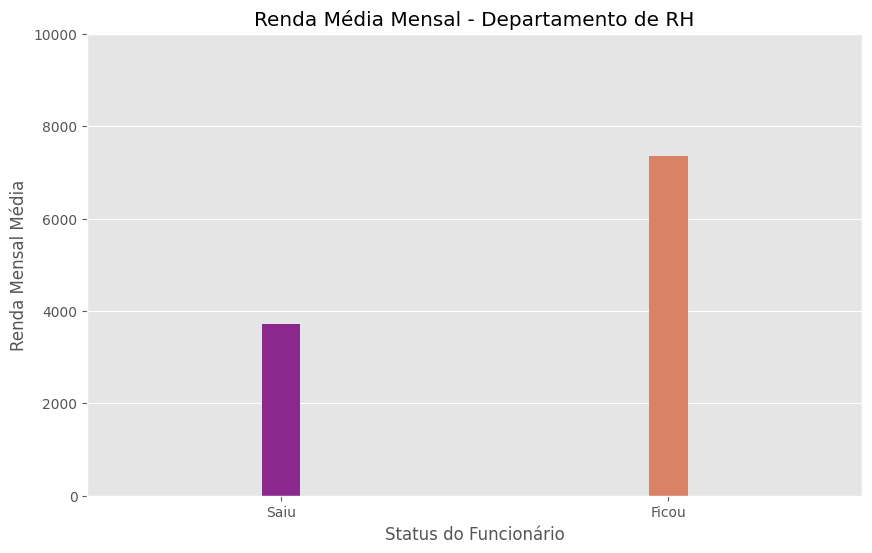

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='Status',y='Renda_Media', data=df_renda_rh,hue='Status',palette='plasma',width=0.1)

# Adiciona título e rótulos
plt.title('Renda Média Mensal - Departamento de RH')
plt.xlabel('Status do Funcionário')
plt.ylabel('Renda Mensal Média')
plt.ylim(0, 10000) # Ajusta o limite do eixo y para melhor visualização

plt.show()

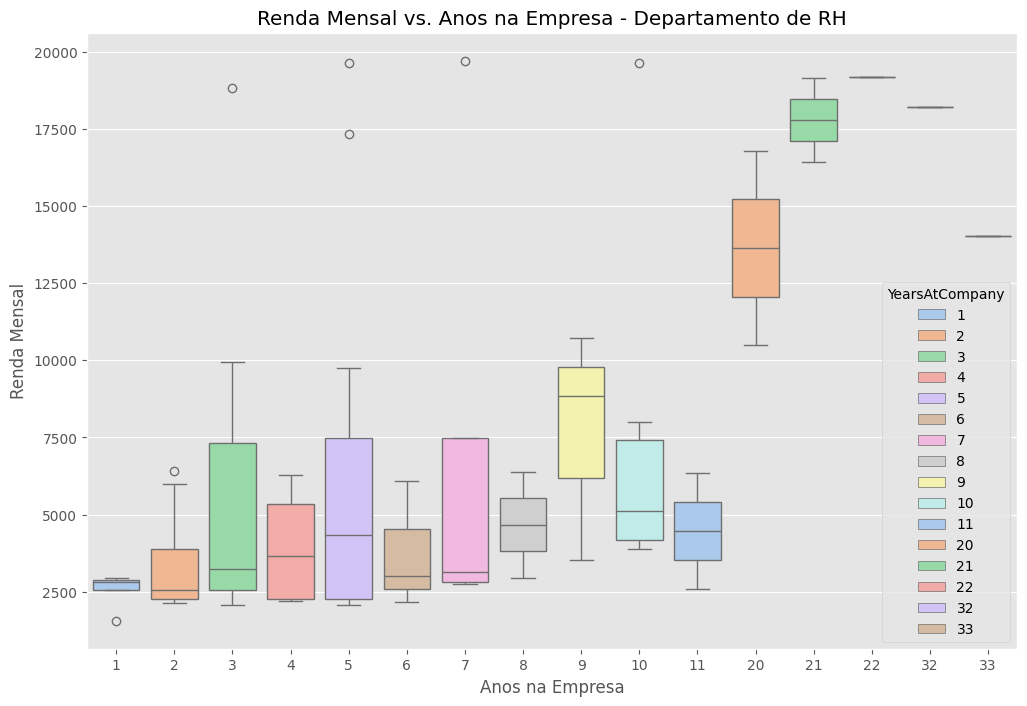

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='YearsAtCompany', y='MonthlyIncome', data=df_rh,hue='YearsAtCompany', palette='pastel')

plt.title('Renda Mensal vs. Anos na Empresa - Departamento de RH')
plt.xlabel('Anos na Empresa')
plt.ylabel('Renda Mensal')

plt.show()

(0.0, 22000.0)

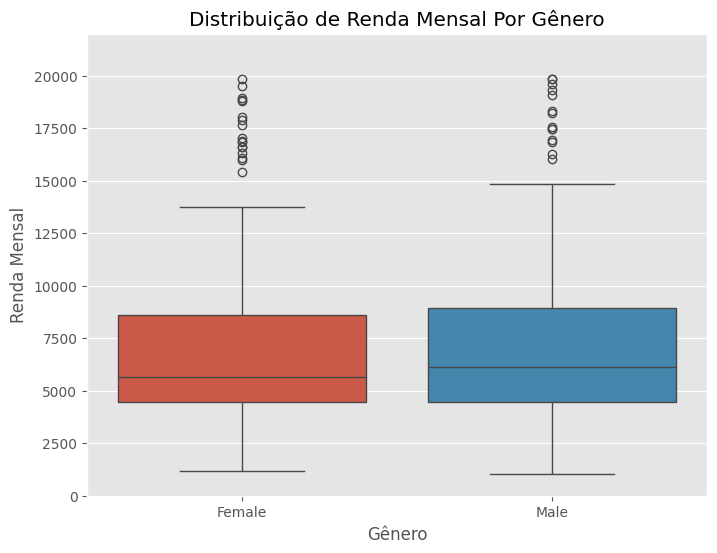

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender',y='MonthlyIncome', data=df_sales, hue='Gender')

plt.title('Distribuição de Renda Mensal Por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Renda Mensal')

plt.ylim(0,22000)

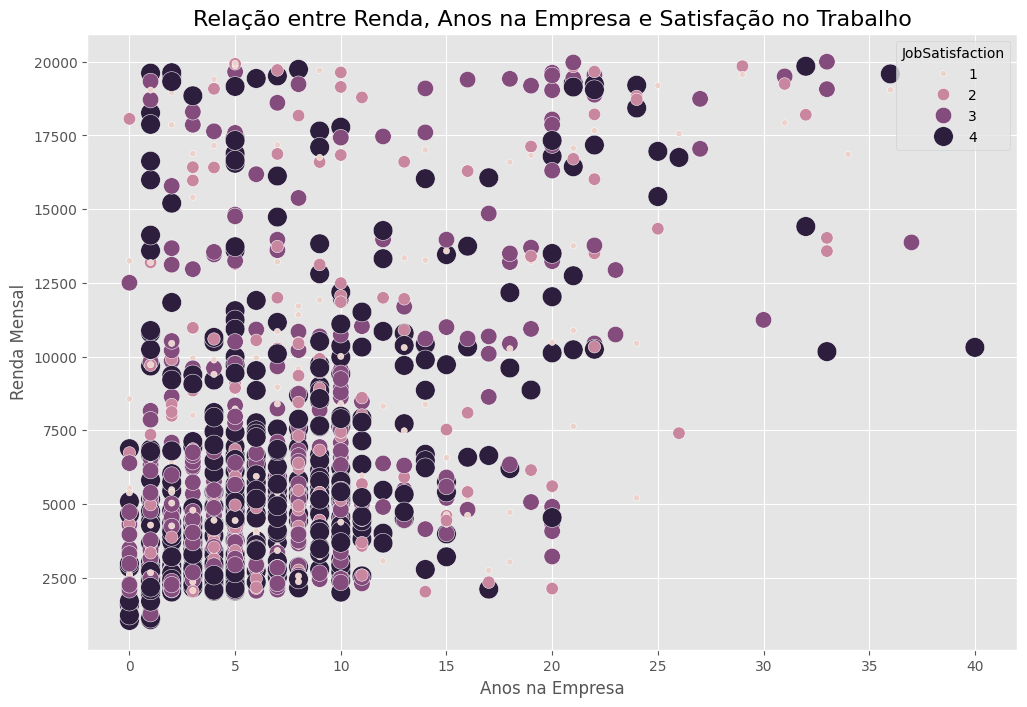

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', hue='JobSatisfaction', size='JobSatisfaction', data=df, sizes=(20, 200))

plt.title('Relação entre Renda, Anos na Empresa e Satisfação no Trabalho', fontsize=16)
plt.xlabel('Anos na Empresa')
plt.ylabel('Renda Mensal')
plt.show()

### **Conclusão**

Este estudo teve como objetivo aprofundar a compreensão sobre a alta taxa de turnover no departamento de Vendas, investigando as possíveis causas por meio de uma **análise descritiva** e **exploratória de dados**.

Inicialmente, foram testadas hipóteses relacionadas a fatores como **satisfação no trabalho**, **remuneração** e **tempo desde a última promoção**. A análise descritiva revelou que, embora existam diferenças entre os grupos de funcionários que saíram e os que permaneceram, estas não são expressivamente grandes a ponto de serem consideradas a principal causa isolada do turnover.

A descoberta mais significativa da análise exploratória foi a distribuição do turnover por faixa etária. Ao calcular a porcentagem de desligamentos em relação ao total de funcionários em cada grupo de idade, ficou evidente que a faixa etária de **18 a 25 anos** apresenta a maior taxa de turnover, com **43,90%**. Esse dado é crucial, pois contradiz a primeira impressão de que o grupo de 26 a 35 anos seria o mais impactado, visto que este possui o maior número absoluto de desligamentos.

Aprofundando a análise, a investigação sobre o gênero revelou que o público feminino nessa faixa etária é particularmente afetado, reforçando a necessidade de atenção a este grupo.

Com base nestes **insights**, as seguintes recomendações estratégicas são propostas ao departamento de Recursos Humanos:

* **Foco na Geração Z:** O alto turnover entre os funcionários mais jovens sugere a necessidade de programas e iniciativas direcionadas a esta geração, que valoriza a cultura empresarial e o propósito no trabalho.
* **Aprimoramento Salarial e de Carreira:** Embora não seja o único fator, a análise da renda mensal e das promoções indica a importância de revisar a distribuição de salários e garantir caminhos de crescimento claros, especialmente para as mulheres, para promover a equidade e a retenção.
* **Fortalecimento da Cultura:** Sugere-se a promoção de workshops e atividades que reforcem a cultura da empresa e seus valores, criando um ambiente mais inclusivo e motivador que incentive os funcionários a permanecerem a longo prazo.

Esta análise de dados oferece uma base sólida para a tomada de decisões estratégicas, com isso o RH pode agir em áreas de maior impacto para mitigar o problema do turnover no departamento de Vendas.
